# Estimating Fish Weight- Using Multiple Linear Regression

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#lg-skt">Multiple Linear Regression Using Scikit Learn Library</a></li>
<li><a href="#lg-grd">Multiple Linear Regression Using Gradient Descent Implementation</a></li>
<li><a href="#lg-ne">Multiple Linear Regression Using Normal Equation</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
### Introduction

Using the fish market data set we will try to create a model to estimate fish weight, this model will be based on multiple linear regression.

We will be trying out three approaches:
    1. Using the Scikit library.
    2. Using the gradient descent implementation which gives us a way to fine tune hyper parameters like learning rate.
    3. Using Normal equation implementation, this equation is helpful in a way that is does not require us to go through iterations and chossing learning rate as is the case with gradient descent.

<a id='eda'></a>
### Exploratory Data Analysis

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Fish.csv')
print(df.shape)
df.sample(10)

(159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
85,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
71,Parkki,300.0,24.0,26.0,29.0,11.3680,4.2340
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792
104,Perch,265.0,25.4,27.5,28.9,7.0516,4.3350
125,Perch,1100.0,40.1,43.0,45.5,12.5125,7.4165
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960


Species -->	species name of fish

Weight -->	weight of fish in Gram g

Length1 --> vertical length in cm

Length2 -->	diagonal length in cm

Length3 -->	cross length in cm

Height -->	height in cm

Width -->	diagonal width in cm

In [6]:
print(df.Species.unique())
print(df.info())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


In [7]:
print(df.describe())

            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

Bream


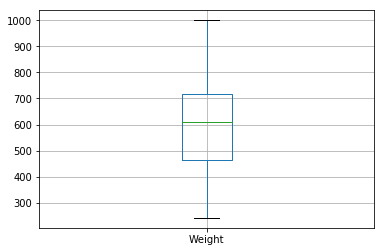

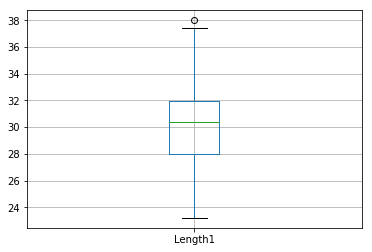

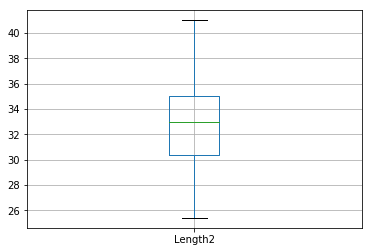

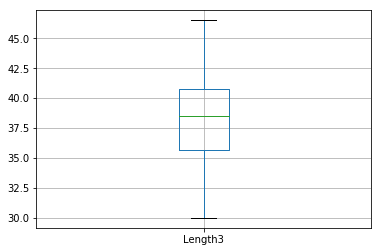

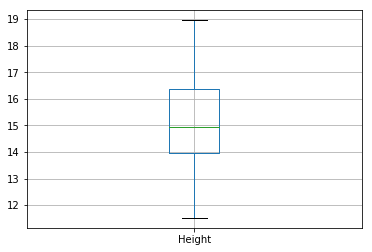

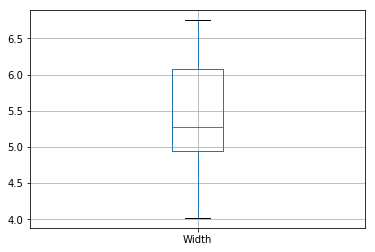

Roach


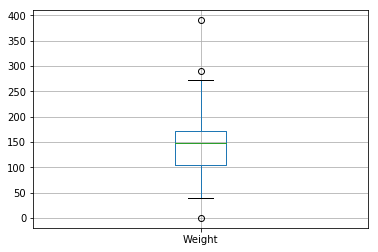

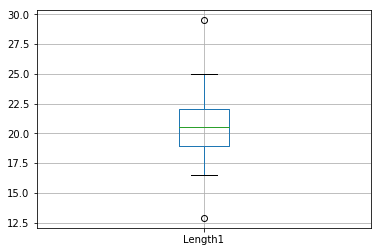

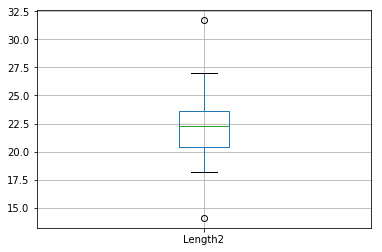

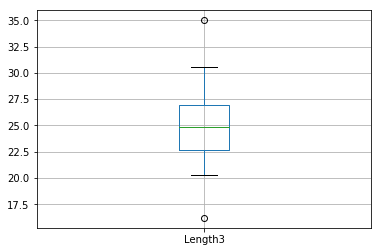

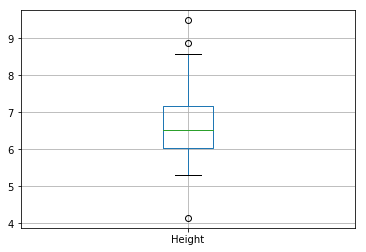

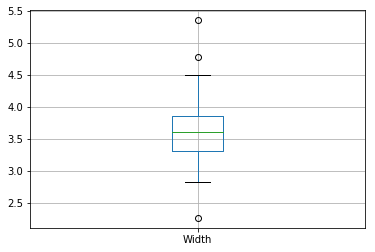

Whitefish


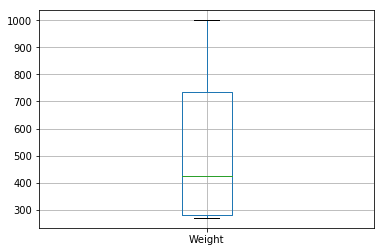

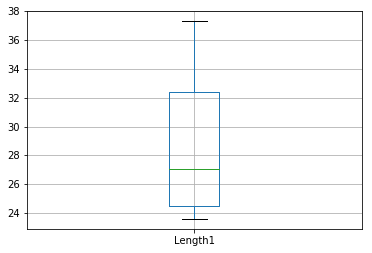

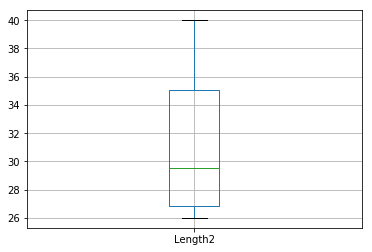

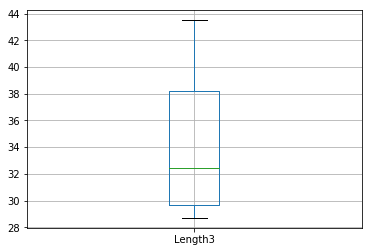

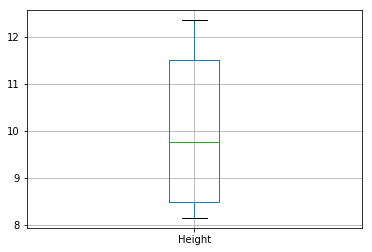

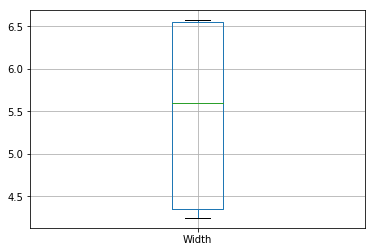

Parkki


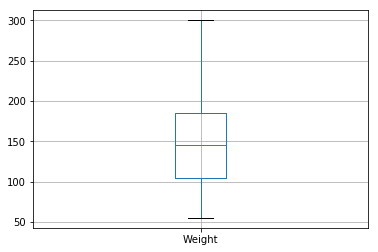

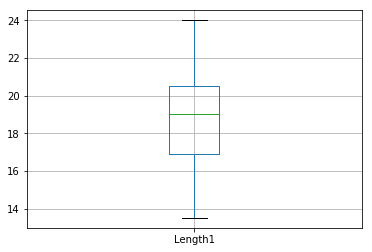

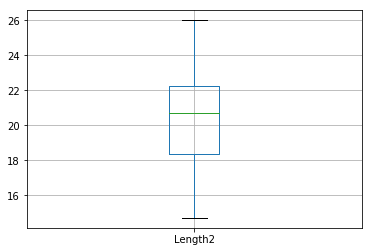

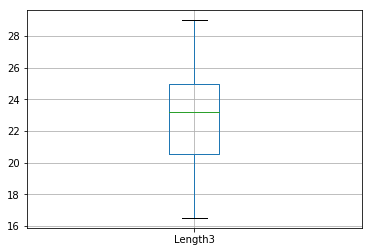

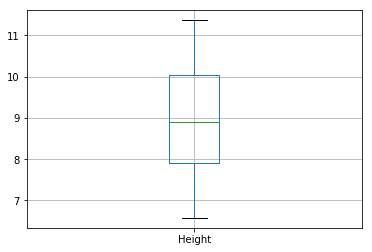

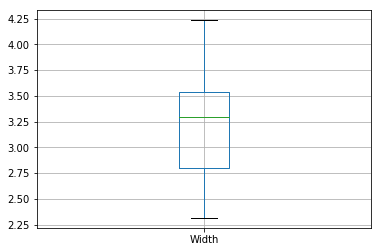

Perch


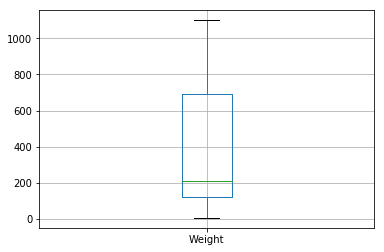

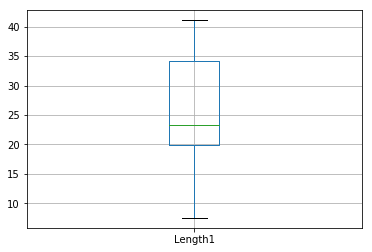

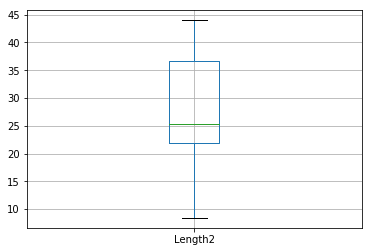

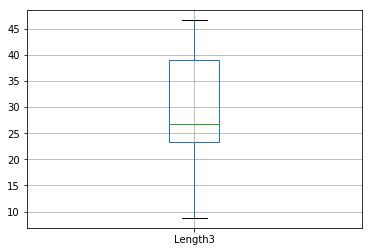

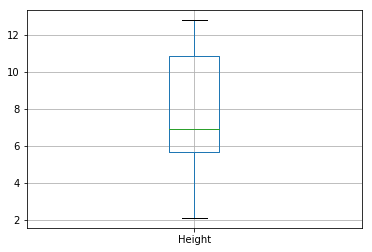

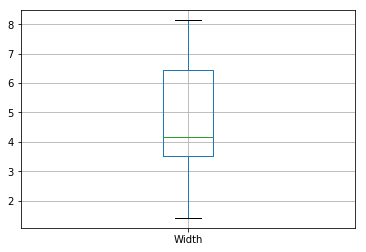

Pike


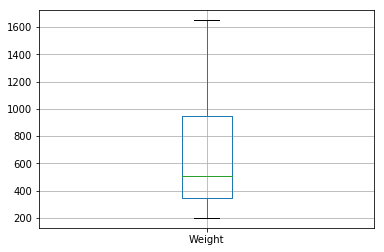

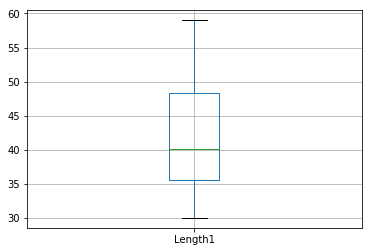

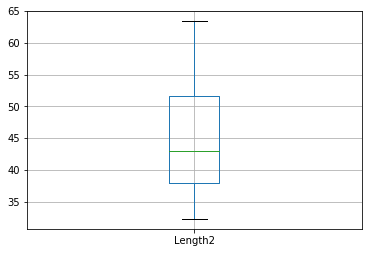

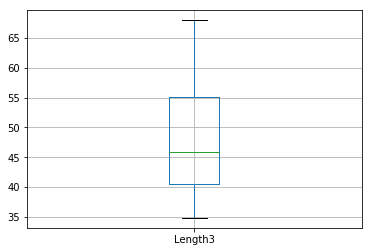

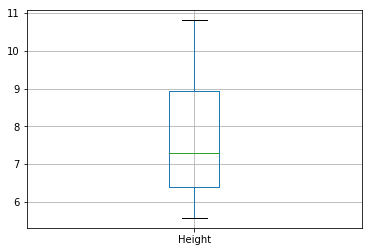

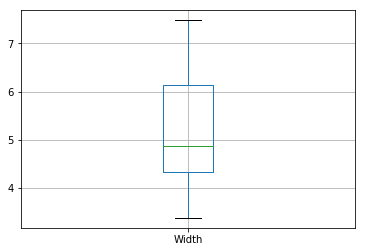

Smelt


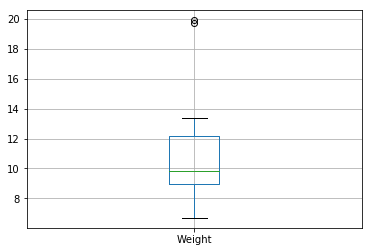

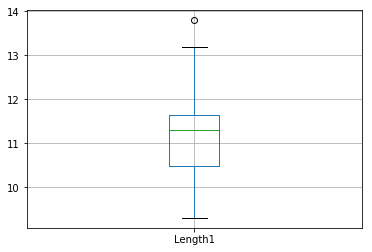

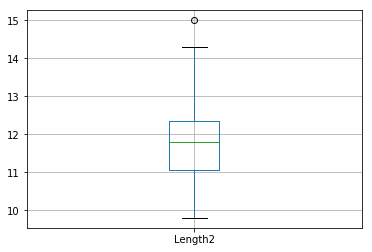

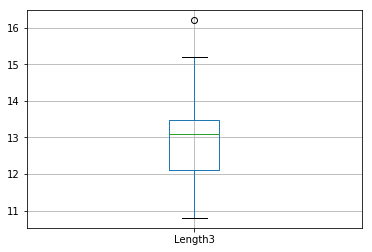

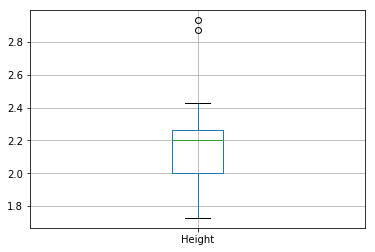

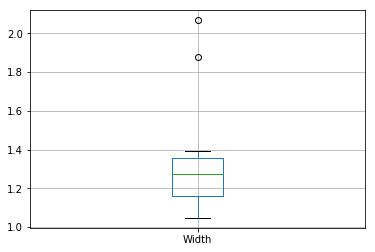

In [9]:
for specie in df.Species.unique():
    df_spe=df.query('Species==@specie')
    print(specie)
    for col in df_spe.columns:
        if(col =='Species'):continue
        df_spe.boxplot(col)
        plt.show()

Looking at the Specie wise box plots, we observe that for "Roach" specie, there are two records which are having anamoly.
    1. In one record the Weight is zero.
    2. In second record, the Weight, Length1, Length2, Length3, Height and Width measurements are all outliers.

In [11]:
df.query('Species=="Roach" & (Weight ==0 | Weight>350)')

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
54,Roach,390.0,29.5,31.7,35.0,9.4850,5.3550


So, we will drop the record with Index 54, since in this record all the parameters are outliers.

In [12]:
df= df.drop([54])
df.query('Species =="Roach"').describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,19.0,139.526316,70.836563,0.0000,98.50000,145.0000,165.00000,290.0000
Length1,19.0,20.178947,2.837366,12.9000,18.80000,20.5000,22.00000,25.0000
Length2,19.0,21.778947,2.980414,14.1000,20.25000,22.0000,23.45000,27.0000
Length3,19.0,24.442105,3.357631,16.2000,22.50000,24.7000,26.75000,30.6000
Height,19.0,6.547942,1.106207,4.1472,5.95955,6.4752,7.06000,8.8768
Width,19.0,3.568526,0.578490,2.2680,3.30965,3.5742,3.82775,4.7736


For the record where the weight is zero, looking at this record we see that the Length1,Length2,Length3 and width for this record lies around the 1st Quartile, and since this is just one record, we chose to replace the weight 0 with the 1st quartile value of weight.

In [13]:
df.iloc[40,1]=df.query('Species =="Roach"').describe().T['25%'].Weight

In [14]:
df.query('Species =="Roach"').describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,19.0,144.710526,63.256821,40.0000,104.25000,145.0000,165.00000,290.0000
Length1,19.0,20.178947,2.837366,12.9000,18.80000,20.5000,22.00000,25.0000
Length2,19.0,21.778947,2.980414,14.1000,20.25000,22.0000,23.45000,27.0000
Length3,19.0,24.442105,3.357631,16.2000,22.50000,24.7000,26.75000,30.6000
Height,19.0,6.547942,1.106207,4.1472,5.95955,6.4752,7.06000,8.8768
Width,19.0,3.568526,0.578490,2.2680,3.30965,3.5742,3.82775,4.7736


Now we will look at the attributes in a consolidated way.

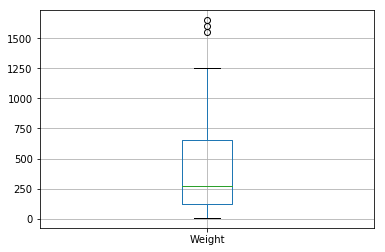

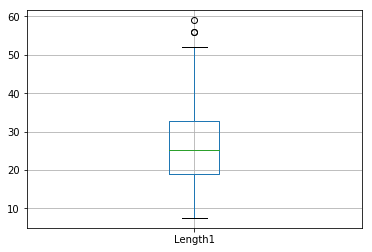

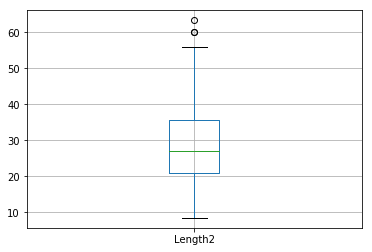

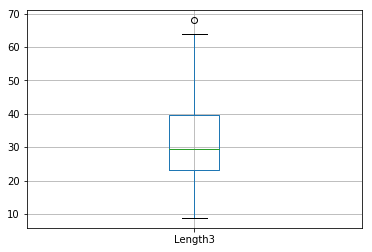

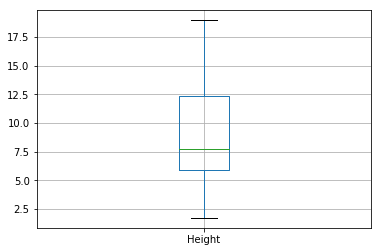

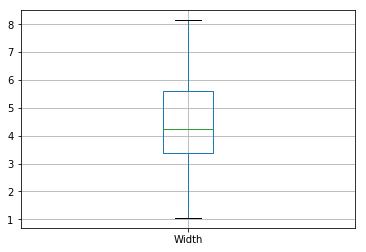

In [15]:
for col in df.columns:
    if(col =='Species'):continue
    df.boxplot(col)
    plt.show()

Here we observe that there are three outliers in 'Weight' attribute.

In [16]:
df.query('Weight> 1500')

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [17]:
df= df.query('Weight<= 1500')

In [18]:
df.query('Weight> 1500')

,Species,Weight,Length1,Length2,Length3,Height,Width


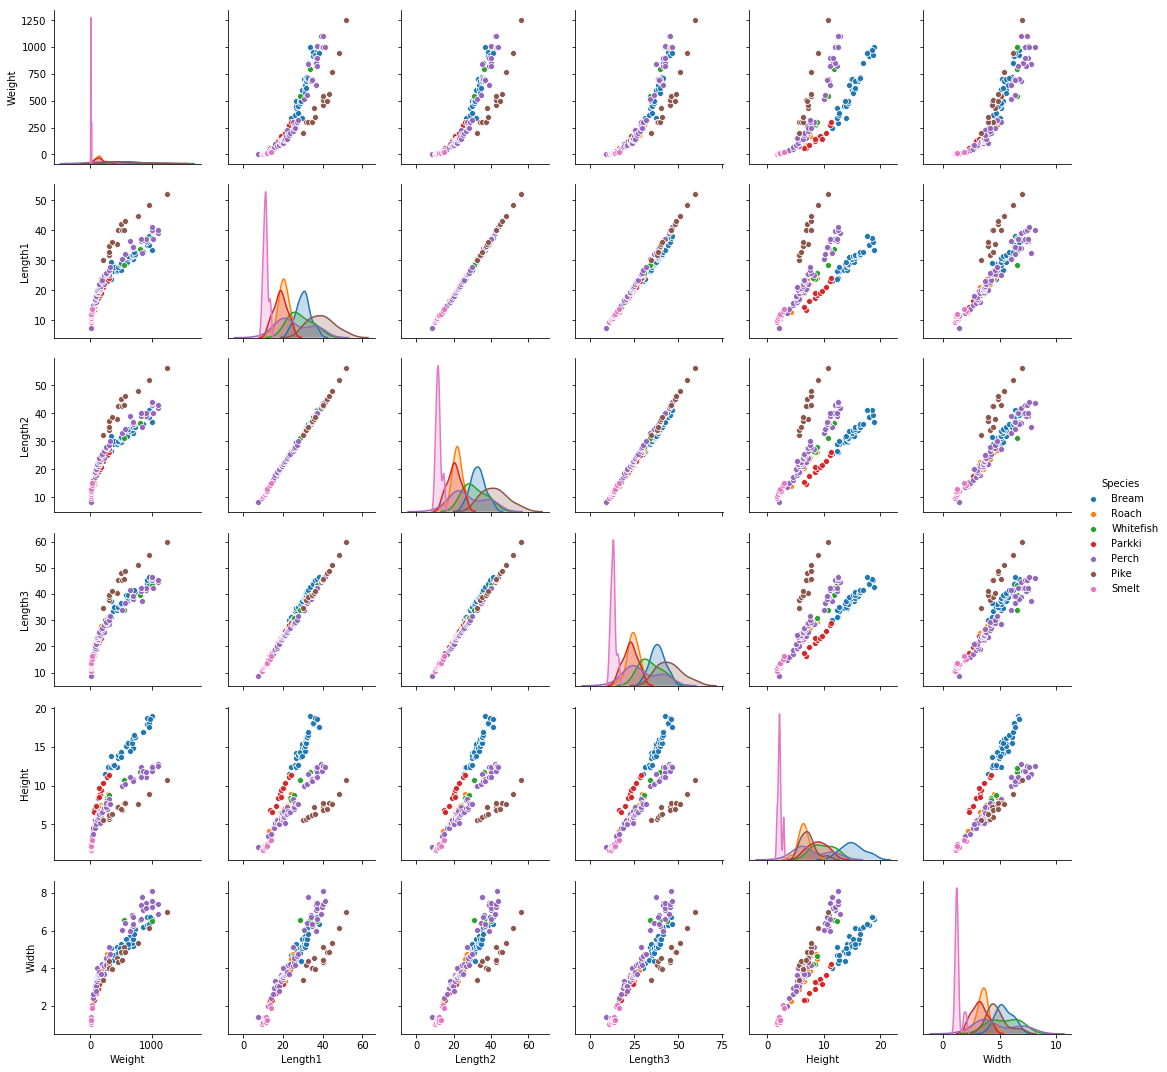

In [19]:
sb.pairplot(df, kind='scatter', hue='Species');

<a id='lg-skt'></a>
### Multiple Linear Regression Using Scikit Learn Library

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Species']= label_encoder.fit_transform(df['Species']) 

df['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5], dtype=int64)

In [23]:
X=df.drop(['Weight'] , axis=1, inplace=False)
X.head()

,Species,Length1,Length2,Length3,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340


In [24]:
y= df[df.columns[1:2]]

In [25]:
lg = LinearRegression()
lstSeed=[]
lstRMSQ=[]
lstRSq=[]
for seed in range(0,150,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    lg.fit(X_train, y_train) #training the algorithm
    pred = lg.predict(X_test)
    root_mean_sq = np.sqrt(metrics.mean_squared_error(y_test,pred))
    r_sq = metrics.r2_score(y_test,pred)
    lstRSq.append(r_sq)
    lstSeed.append(seed)
    lstRMSQ.append(root_mean_sq)

In [26]:
df_metric=pd.DataFrame({
    'Seed': lstSeed, 
    'RMSQ': lstRMSQ,
    'RSQ': lstRSq})
df_metric.head()

,Seed,RMSQ,RSQ
0,0,104.059345,0.891310
1,10,71.982915,0.921626
2,20,99.755412,0.904982
3,30,78.309293,0.930355
4,40,109.889363,0.851128


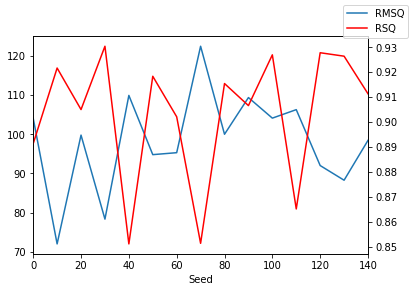

In [27]:
ax=df_metric.plot('Seed', 'RMSQ',legend=False)
ax2 = ax.twinx()
df_metric.plot('Seed', 'RSQ', ax=ax2,color="r",legend=False)
ax.figure.legend()
plt.show()

Looking at the plot we can choose the seed value to be 10

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
lg.fit(X_train, y_train) #training the algorithm
pred = lg.predict(X_test)
print('root mean sq:',np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('r squared:',metrics.r2_score(y_test,pred))

root mean sq: 71.98291485326412
r squared: 0.9216260984817871


<a id='lg-grd'></a>
### Multiple Linear Regression Using Gradient Descent Implementation

In this section we will explicitly implement gradient descent and cost function, we will tune various parameters like learning rate, iterations etc.

In [29]:
X=df.drop(['Weight'] , axis=1, inplace=False)
y= df[df.columns[1:2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train_inter = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X_train_inter, X_train), axis = 1)

X_test_inter = np.ones((X_test.shape[0],1))
X_test = np.concatenate((X_test_inter, X_test), axis = 1)
print(X_train.shape)
print(X_test.shape)

(124, 7)
(31, 7)


In [30]:
def computeCost(X,y,theta):
    #number of training examples
    m= len(y)
    hypothesis= X.dot(theta)
    #Take a summation of the squared values
    delta=np.sum(np.square(hypothesis-y))
    J=(1/(2*m))*delta
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    #number of training examples
    m, n = np.shape(X)
    x_t = X.transpose()
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        hypothesis = np.dot(X,theta)-y
        gradient = np.dot(x_t, hypothesis) / m
        #update the theta
        theta = theta- alpha*gradient
        J_history[i]=np.sum(hypothesis**2) / (2*m)
    return theta,J_history

def predict(x_test,theta):
    n = len(x_test)
    predicted_vals=[]
    for i in range(0,n):
        predicted_vals.append(np.matmul(theta.T,x_test[i,:]))
    return predicted_vals

def runEpoch(X,y,theta,alpha,iterations,epochs):
    dicGradient={}
    dicRMSQ={}
    dicRSQ={}
    dicJ_Hist={}
    J_hist=[]
    X_t_act, X_valid, y_t_act, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    for epoch in range(epochs):
        print('Running Epoch {}'.format(epoch))
        theta,J_History=gradientDescent(X_t_act,y_t_act,theta,alpha,iterations)
        dicGradient[epoch]=(theta,J_History)
        J_hist.extend(J_History)
        pred_vals=predict(X_valid,theta)
        root_mean_sq = np.sqrt(metrics.mean_squared_error(y_valid,pred_vals))
        r_sq = metrics.r2_score(y_valid,pred_vals)
        dicRMSQ[epoch]=root_mean_sq
        print('Epoch {0}: RMSQ {1}'.format(epoch,root_mean_sq))
        dicRSQ[epoch]=r_sq
    key_min = min(dicRMSQ.keys(), key=(lambda k: dicRMSQ[k]))
    return dicGradient[key_min][0],J_hist

Running Epoch 0
Epoch 0: RMSQ 180.7493512866518
Running Epoch 1
Epoch 1: RMSQ 173.48197960583292
Running Epoch 2
Epoch 2: RMSQ 165.79334871486378
Running Epoch 3
Epoch 3: RMSQ 158.88710135337035
Running Epoch 4
Epoch 4: RMSQ 152.89486091440108
Running Epoch 5
Epoch 5: RMSQ 147.73227036569156
Running Epoch 6
Epoch 6: RMSQ 143.28952201090675
Running Epoch 7
Epoch 7: RMSQ 139.4648237770562
Running Epoch 8
Epoch 8: RMSQ 136.16900752488044
Running Epoch 9
Epoch 9: RMSQ 133.3250910546582
Running Epoch 10
Epoch 10: RMSQ 130.86702137431521
Running Epoch 11
Epoch 11: RMSQ 128.73835130945204
Running Epoch 12
Epoch 12: RMSQ 126.89099102515219
Running Epoch 13
Epoch 13: RMSQ 125.28406649350104
Running Epoch 14
Epoch 14: RMSQ 123.88289390793898
Running Epoch 15
Epoch 15: RMSQ 122.6580710699216
Running Epoch 16
Epoch 16: RMSQ 121.58468205237106
Running Epoch 17
Epoch 17: RMSQ 120.64160819981986
Running Epoch 18
Epoch 18: RMSQ 119.8109364621198
Running Epoch 19
Epoch 19: RMSQ 119.07745499793857
Runni

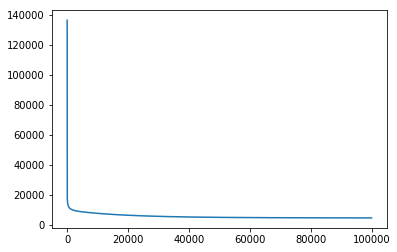

In [31]:
n=X_train.shape[1]
theta=np.zeros((n, 1))
theta,J_History=runEpoch(X_train,y_train,theta,0.00065,4000,25)
print(theta)
plt.plot(J_History);
plt.show();

In [32]:
pred_vals=predict(X_test,theta)
preds=[]
for pred in pred_vals:
    preds.append(abs(pred[0]))

In [33]:
root_mean_sq = np.sqrt(metrics.mean_squared_error(y_test,preds))
r_sq = metrics.r2_score(y_test,preds)
print('root mean sq:',root_mean_sq)
print('r squared:',r_sq)

root mean sq: 67.94937092960402
r squared: 0.930163335288442


<a id='lg-ne'></a>
### Multiple Linear Regression Using Normal Equation

Normal equation, will for some linear regression (usually when features are less than aprroximately 10000) problems gives us a much better way to solve the optimal value of $\theta$

**Normal Equation**

$\theta = (X^{T}X)^{-1}X^{T}y$

In [34]:
def normalEquation(X,y):
    x_trans=X.T
    inv=np.linalg.pinv(np.dot(x_trans,X))
    theta=np.dot(np.dot(inv,x_trans),y)
    return theta

In [35]:
theta_ne= normalEquation(X_train,y_train)
print(theta_ne)

[[-560.92820904]
 [  34.75490498]
 [  49.95213505]
 [  34.2289648 ]
 [ -63.60618505]
 [  59.30651839]
 [  10.45098739]]


In [36]:
pred_vals=predict(X_test,theta_ne)
preds=[]
for pred in pred_vals:
    preds.append(abs(pred[0]))
root_mean_sq = np.sqrt(metrics.mean_squared_error(y_test,preds))
r_sq = metrics.r2_score(y_test,preds)
print('root mean sq:',root_mean_sq)
print('r squared:',r_sq)

root mean sq: 68.96225587483403
r squared: 0.9280657817429825


<a id='conclusions'></a>
### Conclusions

In context of this data set we can see that the gradient descent implementation gives a bit better result than Scikit library or using Normal equation, this may be attributed to tuning parameters available with gradient descent.
But gradient descent has drawback with respect to Normal Equation, that it has to go through lot more iterations (time consuming) and we need to choose learning rate.